In [39]:
# NOTE: has to be done in python 2.7 as python 3 currently not supported by the fitparse package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import fitparse
from scipy.signal import savgol_filter
# for plotting on Google maps
import gmplot
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

# Using pandas

We can see below that the .csv files available for download from Garmin Connect barely contain any information. They (at least for this running dataset) are split into 1km splits.

As such, we use the fitparse module that has been developed to handle the .FIT files available from Garmin Connect. The issue here is that this package is new and thus a lot of functionality is missing or not perfected.

In [2]:
data = pd.read_csv('Gary_run_030218.csv', index_col=0)
data

,Time,Moving Time,Distance,Elevation Gain,Elev Loss,Avg Pace,Avg Moving Paces,Best Pace,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg HR,Max HR,Avg Temperature,Calories
Split,,,,,,,,,,,,,,,
1,00:04:23.872,00:04:20.00,1.00,2,27,0:04:23,0:04:20,0:03:52,185.875000,204.0,122.700000,144.0,157.0,--,63
2,00:05:05.188,00:05:02.00,1.00,41,4,0:05:05,0:05:02,0:04:22,176.859375,183.0,111.859998,156.0,167.0,--,69
3,00:04:51.892,00:04:50.00,1.00,13,22,0:04:51,0:04:50,0:03:58,183.671875,206.0,112.109998,160.0,168.0,--,77
4,00:04:46.792,00:04:43.00,1.00,28,18,0:04:46,0:04:43,0:03:19,182.343750,205.0,115.340002,165.0,179.0,--,77
5,00:04:54.454,00:04:54.00,1.00,5,16,0:04:54,0:04:54,0:03:58,178.640625,197.0,114.940002,157.0,164.0,--,74
6,00:05:18.656,00:05:16.00,1.00,10,10,0:05:18,0:05:16,0:04:09,177.906250,242.0,106.609998,154.0,170.0,--,73
7,00:04:14.487,00:04:10.00,1.00,10,16,0:04:14,0:04:10,0:03:47,187.390625,206.0,126.900000,168.0,173.0,--,69
8,00:04:16.327,00:04:14.00,1.00,8,9,0:04:16,0:04:14,0:03:50,185.437500,196.0,126.419995,171.0,175.0,--,72
9,00:04:12.939,00:04:12.00,1.00,8,16,0:04:12,0:04:12,0:03:52,187.359375,206.0,127.059998,171.0,174.0,--,71


# Using fitparse

In [3]:
fitfile = fitparse.FitFile('Gary_run_030218.fit')
print(type(fitfile))

<class 'fitparse.base.FitFile'>


In [4]:
fitfile.messages

[<DataMessage: file_id (#0) -- local mesg: #0, fields: [serial_number: 3949767153, time_created: 2018-02-03 08:40:19, unknown_7: None, manufacturer: garmin, garmin_product: fr920xt, number: None, type: activity]>,
 <DataMessage: file_creator (#49) -- local mesg: #1, fields: [software_version: 950, hardware_version: None]>,
 <DataMessage: event (#21) -- local mesg: #2, fields: [timestamp: 2018-02-03 08:40:19, timer_trigger: manual, event: timer, event_type: start, event_group: 0]>,
 <DataMessage: device_info (#23) -- local mesg: #3, fields: [timestamp: 2018-02-03 08:40:19, serial_number: 3949767153, cum_operating_time: None, unknown_8: None, unknown_15: None, unknown_16: None, manufacturer: garmin, garmin_product: fr920xt, software_version: 9.5, battery_voltage: None, ant_device_number: None, device_index: creator, device_type: None, hardware_version: None, unknown_9: None, battery_status: None, ant_transmission_type: None, ant_network: None, unknown_23: None, source_type: local]>,
 <Da

This is pretty difficult to interpret! But can use the get_messages() method to pick out all of the 'record' messages, for example.

It looks like the 'record' messages are the time samples containing the useful measurements

The below print code is taken from the fitparse documentation example:

In [5]:
get_records = list(fitfile.get_messages('record'))  # list(Generator object)
print 'Number of records in file:', len(get_records)

# Get all data messages that are of type record
for record in fitfile.get_messages('record'):

    # Go through all the data entries in this record
    for record_data in record:

        # Print the records name and value (and units if it has any)
        if record_data.units:
            print " * %s: %s %s" % (
                record_data.name, record_data.value, record_data.units,
            )
        else:
            print " * %s: %s" % (record_data.name, record_data.value)
    print

Number of records in file: 699
 * activity_type: running
 * altitude: 169.0 m
 * cadence: 89 rpm
 * distance: 0.0 m
 * enhanced_altitude: 169.0 m
 * enhanced_speed: 2.706 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 86 bpm
 * position_lat: 640064232 semicircles
 * position_long: -21520330 semicircles
 * speed: 2.706 m/s
 * stance_time: 225.0 ms
 * stance_time_balance: 49.78 percent
 * stance_time_percent: 33.25 percent
 * step_length: 605.0 mm
 * timestamp: 2018-02-03 08:40:19
 * vertical_oscillation: 88.7 mm
 * vertical_ratio: 14.15 percent
 * unknown_61: 3624
 * unknown_66: 47

 * activity_type: running
 * altitude: 169.0 m
 * cadence: 90 rpm
 * distance: 0.0 m
 * enhanced_altitude: 169.0 m
 * enhanced_speed: 1.847 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 87 bpm
 * position_lat: 640064294 semicircles
 * position_long: -21520980 semicircles
 * speed: 1.847 m/s
 * stance_time: 222.0 ms
 * stance_time_balance: 49.87 percent
 * stance_time_percent: 33.0 percent
 * step_leng

 * altitude: 143.2 m
 * cadence: 92 rpm
 * distance: 809.17 m
 * enhanced_altitude: 143.2 m
 * enhanced_speed: 4.255 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 153 bpm
 * position_lat: 639999578 semicircles
 * position_long: -21585831 semicircles
 * speed: 4.255 m/s
 * stance_time: 212.0 ms
 * stance_time_balance: 50.53 percent
 * stance_time_percent: 32.5 percent
 * step_length: 1157.0 mm
 * timestamp: 2018-02-03 08:43:52
 * vertical_oscillation: 90.7 mm
 * vertical_ratio: 6.9 percent
 * unknown_61: 3495
 * unknown_66: 46

 * activity_type: running
 * altitude: 143.0 m
 * cadence: 93 rpm
 * distance: 824.83 m
 * enhanced_altitude: 143.0 m
 * enhanced_speed: 4.199 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 152 bpm
 * position_lat: 639998033 semicircles
 * position_long: -21586924 semicircles
 * speed: 4.199 m/s
 * stance_time: 207.0 ms
 * stance_time_balance: 50.53 percent
 * stance_time_percent: 32.0 percent
 * step_length: 1242.0 mm
 * timestamp: 2018-02-03 08:43:56
 * 

 * distance: 1697.35 m
 * enhanced_altitude: 181.4 m
 * enhanced_speed: 3.238 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 162 bpm
 * position_lat: 640050698 semicircles
 * position_long: -21609873 semicircles
 * speed: 3.238 m/s
 * stance_time: 217.0 ms
 * stance_time_balance: 50.78 percent
 * stance_time_percent: 32.5 percent
 * step_length: 1087.0 mm
 * timestamp: 2018-02-03 08:48:24
 * vertical_oscillation: 87.7 mm
 * vertical_ratio: 8.0 percent
 * unknown_61: 3686
 * unknown_66: 46

 * activity_type: running
 * altitude: 181.0 m
 * cadence: 90 rpm
 * distance: 1718.81 m
 * enhanced_altitude: 181.0 m
 * enhanced_speed: 3.303 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 159 bpm
 * position_lat: 640052540 semicircles
 * position_long: -21607570 semicircles
 * speed: 3.303 m/s
 * stance_time: 218.0 ms
 * stance_time_balance: 50.78 percent
 * stance_time_percent: 32.75 percent
 * step_length: 1129.0 mm
 * timestamp: 2018-02-03 08:48:29
 * vertical_oscillation: 85.7 mm
 * vert

 * position_lat: 640102292 semicircles
 * position_long: -21601577 semicircles
 * speed: 4.078 m/s
 * stance_time: 219.0 ms
 * stance_time_balance: 50.28 percent
 * stance_time_percent: 32.5 percent
 * step_length: 1204.0 mm
 * timestamp: 2018-02-03 08:51:30
 * vertical_oscillation: 90.7 mm
 * vertical_ratio: 7.21 percent
 * unknown_61: 3750
 * unknown_66: 46

 * activity_type: running
 * altitude: 195.0 m
 * cadence: 90 rpm
 * distance: 2369.56 m
 * enhanced_altitude: 195.0 m
 * enhanced_speed: 3.928 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 162 bpm
 * position_lat: 640104664 semicircles
 * position_long: -21601843 semicircles
 * speed: 3.928 m/s
 * stance_time: 224.0 ms
 * stance_time_balance: 50.46 percent
 * stance_time_percent: 33.5 percent
 * step_length: 1201.0 mm
 * timestamp: 2018-02-03 08:51:36
 * vertical_oscillation: 88.7 mm
 * vertical_ratio: 7.21 percent
 * unknown_61: 3754
 * unknown_66: 46

 * activity_type: running
 * altitude: 195.0 m
 * cadence: 89 rpm
 * dis

 * stance_time_percent: 32.5 percent
 * step_length: 1171.0 mm
 * timestamp: 2018-02-03 08:55:15
 * vertical_oscillation: 71.2 mm
 * vertical_ratio: 6.12 percent
 * unknown_61: 3658
 * unknown_66: 46

 * activity_type: running
 * altitude: 177.0 m
 * cadence: 100 rpm
 * distance: 3119.0 m
 * enhanced_altitude: 177.0 m
 * enhanced_speed: 3.835 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 167 bpm
 * position_lat: 640140628 semicircles
 * position_long: -21572205 semicircles
 * speed: 3.835 m/s
 * stance_time: 197.0 ms
 * stance_time_balance: 50.9 percent
 * stance_time_percent: 32.75 percent
 * step_length: 1171.0 mm
 * timestamp: 2018-02-03 08:55:18
 * vertical_oscillation: 69.2 mm
 * vertical_ratio: 5.93 percent
 * unknown_61: 3664
 * unknown_66: 46

 * activity_type: running
 * altitude: 177.2 m
 * cadence: 100 rpm
 * distance: 3122.67 m
 * enhanced_altitude: 177.2 m
 * enhanced_speed: 3.826 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 170 bpm
 * position_lat: 640140472 semi

 * distance: 3825.17 m
 * enhanced_altitude: 186.6 m
 * enhanced_speed: 3.602 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 160 bpm
 * position_lat: 640093261 semicircles
 * position_long: -21566030 semicircles
 * speed: 3.602 m/s
 * stance_time: 221.0 ms
 * stance_time_balance: 50.65 percent
 * stance_time_percent: 33.5 percent
 * step_length: 1180.0 mm
 * timestamp: 2018-02-03 08:58:37
 * vertical_oscillation: 83.7 mm
 * vertical_ratio: 6.9 percent
 * unknown_61: 3712
 * unknown_66: 46

 * activity_type: running
 * altitude: 186.4 m
 * cadence: 91 rpm
 * distance: 3828.7 m
 * enhanced_altitude: 186.4 m
 * enhanced_speed: 3.602 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 157 bpm
 * position_lat: 640093133 semicircles
 * position_long: -21565427 semicircles
 * speed: 3.602 m/s
 * stance_time: 221.0 ms
 * stance_time_balance: 50.53 percent
 * stance_time_percent: 33.5 percent
 * step_length: 1190.0 mm
 * timestamp: 2018-02-03 08:58:38
 * vertical_oscillation: 83.7 mm
 * vertic

 * timestamp: 2018-02-03 09:02:24
 * vertical_oscillation: 87.7 mm
 * vertical_ratio: 7.5 percent
 * unknown_61: 3622
 * unknown_66: 46

 * activity_type: running
 * altitude: 168.8 m
 * cadence: 89 rpm
 * distance: 4637.13 m
 * enhanced_altitude: 168.8 m
 * enhanced_speed: 3.48 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 162 bpm
 * position_lat: 640102958 semicircles
 * position_long: -21497555 semicircles
 * speed: 3.48 m/s
 * stance_time: 221.0 ms
 * stance_time_balance: 50.87 percent
 * stance_time_percent: 32.5 percent
 * step_length: 1144.0 mm
 * timestamp: 2018-02-03 09:02:30
 * vertical_oscillation: 88.7 mm
 * vertical_ratio: 7.5 percent
 * unknown_61: 3623
 * unknown_66: 46

 * activity_type: running
 * altitude: 168.6 m
 * cadence: 89 rpm
 * distance: 4647.99 m
 * enhanced_altitude: 168.6 m
 * enhanced_speed: 3.499 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 159 bpm
 * position_lat: 640101793 semicircles
 * position_long: -21497386 semicircles
 * speed: 3.499 m/s


 * heart_rate: 152 bpm
 * position_lat: 640046783 semicircles
 * position_long: -21459393 semicircles
 * speed: 3.023 m/s
 * stance_time: 232.0 ms
 * stance_time_balance: 50.87 percent
 * stance_time_percent: 34.75 percent
 * step_length: 1300.0 mm
 * timestamp: 2018-02-03 09:06:43
 * vertical_oscillation: 93.7 mm
 * vertical_ratio: 7.31 percent
 * unknown_61: 3578
 * unknown_66: 46

 * activity_type: running
 * altitude: 160.8 m
 * cadence: 94 rpm
 * distance: 5267.1 m
 * enhanced_altitude: 160.8 m
 * enhanced_speed: 3.116 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 153 bpm
 * position_lat: 640046760 semicircles
 * position_long: -21456428 semicircles
 * speed: 3.116 m/s
 * stance_time: 233.0 ms
 * stance_time_balance: 50.9 percent
 * stance_time_percent: 35.75 percent
 * step_length: 878.0 mm
 * timestamp: 2018-02-03 09:06:49
 * vertical_oscillation: 83.0 mm
 * vertical_ratio: 8.46 percent
 * unknown_61: 3583
 * unknown_66: 46

 * activity_type: running
 * altitude: 160.6 m
 * 

 * unknown_66: 46

 * activity_type: running
 * altitude: 163.4 m
 * cadence: 88 rpm
 * distance: 6010.68 m
 * enhanced_altitude: 163.4 m
 * enhanced_speed: 3.508 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 163 bpm
 * position_lat: 640035704 semicircles
 * position_long: -21438085 semicircles
 * speed: 3.508 m/s
 * stance_time: 237.0 ms
 * stance_time_balance: 50.87 percent
 * stance_time_percent: 34.75 percent
 * step_length: 963.0 mm
 * timestamp: 2018-02-03 09:10:28
 * vertical_oscillation: 84.7 mm
 * vertical_ratio: 8.37 percent
 * unknown_61: 3596
 * unknown_66: 46

 * activity_type: running
 * altitude: 163.0 m
 * cadence: 88 rpm
 * distance: 6016.67 m
 * enhanced_altitude: 163.0 m
 * enhanced_speed: 3.424 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 164 bpm
 * position_lat: 640035297 semicircles
 * position_long: -21437248 semicircles
 * speed: 3.424 m/s
 * stance_time: 235.0 ms
 * stance_time_balance: 51.0 percent
 * stance_time_percent: 34.5 percent
 * step_length: 

 * position_lat: 640046635 semicircles
 * position_long: -21413054 semicircles
 * speed: 3.807 m/s
 * stance_time: 212.0 ms
 * stance_time_balance: 50.56 percent
 * stance_time_percent: 32.5 percent
 * step_length: 1233.0 mm
 * timestamp: 2018-02-03 09:13:30
 * vertical_oscillation: 85.7 mm
 * vertical_ratio: 6.81 percent
 * unknown_61: 3551
 * unknown_66: 46

 * activity_type: running
 * altitude: 155.2 m
 * cadence: 91 rpm
 * distance: 6761.54 m
 * enhanced_altitude: 155.2 m
 * enhanced_speed: 3.826 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 169 bpm
 * position_lat: 640045872 semicircles
 * position_long: -21417046 semicircles
 * speed: 3.826 m/s
 * stance_time: 208.0 ms
 * stance_time_balance: 50.37 percent
 * stance_time_percent: 32.0 percent
 * step_length: 1255.0 mm
 * timestamp: 2018-02-03 09:13:36
 * vertical_oscillation: 85.7 mm
 * vertical_ratio: 6.62 percent
 * unknown_61: 3555
 * unknown_66: 46

 * activity_type: running
 * altitude: 155.6 m
 * cadence: 91 rpm
 * dis

 * vertical_ratio: 7.03 percent
 * unknown_61: 3617
 * unknown_66: 46

 * activity_type: running
 * altitude: 167.6 m
 * cadence: 90 rpm
 * distance: 7569.85 m
 * enhanced_altitude: 167.6 m
 * enhanced_speed: 3.732 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 172 bpm
 * position_lat: 640073439 semicircles
 * position_long: -21462555 semicircles
 * speed: 3.732 m/s
 * stance_time: 214.0 ms
 * stance_time_balance: 50.59 percent
 * stance_time_percent: 32.25 percent
 * step_length: 1184.0 mm
 * timestamp: 2018-02-03 09:17:11
 * vertical_oscillation: 89.7 mm
 * vertical_ratio: 7.21 percent
 * unknown_61: 3617
 * unknown_66: 46

 * activity_type: running
 * altitude: 168.2 m
 * cadence: 91 rpm
 * distance: 7590.41 m
 * enhanced_altitude: 168.2 m
 * enhanced_speed: 3.686 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 172 bpm
 * position_lat: 640074833 semicircles
 * position_long: -21465382 semicircles
 * speed: 3.686 m/s
 * stance_time: 215.0 ms
 * stance_time_balance: 50.87 percent

 * unknown_61: 3561
 * unknown_66: 46

 * activity_type: running
 * altitude: 155.4 m
 * cadence: 102 rpm
 * distance: 8327.55 m
 * enhanced_altitude: 155.4 m
 * enhanced_speed: 4.106 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 170 bpm
 * position_lat: 640039100 semicircles
 * position_long: -21410881 semicircles
 * speed: 4.106 m/s
 * stance_time: 227.0 ms
 * stance_time_balance: 50.15 percent
 * stance_time_percent: 38.5 percent
 * step_length: 1292.0 mm
 * timestamp: 2018-02-03 09:20:16
 * vertical_oscillation: 71.2 mm
 * vertical_ratio: 5.25 percent
 * unknown_61: 3556
 * unknown_66: 46

 * activity_type: running
 * altitude: 154.2 m
 * cadence: 101 rpm
 * distance: 8346.7 m
 * enhanced_altitude: 154.2 m
 * enhanced_speed: 4.143 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 170 bpm
 * position_lat: 640040078 semicircles
 * position_long: -21407852 semicircles
 * speed: 4.143 m/s
 * stance_time: 221.0 ms
 * stance_time_balance: 50.65 percent
 * stance_time_percent: 37.0 pe

 * step_length: 1171.0 mm
 * timestamp: 2018-02-03 09:23:54
 * vertical_oscillation: 84.7 mm
 * vertical_ratio: 7.03 percent
 * unknown_61: 3591
 * unknown_66: 46

 * activity_type: running
 * altitude: 162.6 m
 * cadence: 92 rpm
 * distance: 9169.27 m
 * enhanced_altitude: 162.6 m
 * enhanced_speed: 3.639 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 172 bpm
 * position_lat: 640061936 semicircles
 * position_long: -21428965 semicircles
 * speed: 3.639 m/s
 * stance_time: 215.0 ms
 * stance_time_balance: 50.65 percent
 * stance_time_percent: 33.25 percent
 * step_length: 1182.0 mm
 * timestamp: 2018-02-03 09:23:55
 * vertical_oscillation: 83.7 mm
 * vertical_ratio: 6.9 percent
 * unknown_61: 3592
 * unknown_66: 46

 * activity_type: running
 * altitude: 163.8 m
 * cadence: 93 rpm
 * distance: 9187.4 m
 * enhanced_altitude: 163.8 m
 * enhanced_speed: 3.667 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 172 bpm
 * position_lat: 640062635 semicircles
 * position_long: -21432033 sem

 * fractional_cadence: 0.0 rpm
 * heart_rate: 128 bpm
 * position_lat: 640055421 semicircles
 * position_long: -21470122 semicircles
 * speed: 0.037 m/s
 * step_length: 953.0 mm
 * timestamp: 2018-02-03 09:30:16
 * vertical_oscillation: 49.7 mm
 * vertical_ratio: 2.81 percent
 * unknown_61: 3582
 * unknown_66: 47

 * activity_type: walking
 * altitude: 160.8 m
 * cadence: 55 rpm
 * distance: 10014.23 m
 * enhanced_altitude: 160.8 m
 * enhanced_speed: 1.764 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 129 bpm
 * position_lat: 640055545 semicircles
 * position_long: -21470196 semicircles
 * speed: 1.764 m/s
 * step_length: 354.0 mm
 * timestamp: 2018-02-03 09:30:17
 * vertical_oscillation: 67.2 mm
 * vertical_ratio: 7.5 percent
 * unknown_61: 3583
 * unknown_66: 47

 * activity_type: running
 * altitude: 161.0 m
 * cadence: 60 rpm
 * distance: 10015.41 m
 * enhanced_altitude: 161.0 m
 * enhanced_speed: 1.745 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 129 bpm
 * position_lat: 

Note from the 'timestamp' of each record that the samples look like they are stored every 1 second. But the number of records is 699, and we know that the run was ~ 49m28s, thus we expect (49 x 60) + 28 = 2908 records, so something fishy is going on...

We'll extract the timestamps and see what they are. First, we'll put the data into a pandas DataFrame:

## Put into Pandas DataFrame

In [6]:
record_df_list = [pd.concat([pd.DataFrame([record_data.value], columns=[record_data.name]) for record_data in record], axis=1) \
    for record in fitfile.get_messages('record')]
df = pd.concat(record_df_list, ignore_index=True)
print df.head(2)
print df.info()

  activity_type  altitude  cadence  distance  enhanced_altitude  \
0       running     169.0       89       0.0              169.0   
1       running     169.0       90       0.0              169.0   

   enhanced_speed  fractional_cadence  heart_rate  position_lat  \
0           2.706                 0.5          86     640064232   
1           1.847                 0.0          87     640064294   

   position_long  speed  stance_time  stance_time_balance  \
0      -21520330  2.706        225.0                49.78   
1      -21520980  1.847        222.0                49.87   

   stance_time_percent  step_length           timestamp  unknown_61  \
0                33.25        605.0 2018-02-03 08:40:19        3624   
1                33.00        626.0 2018-02-03 08:40:20        3624   

   unknown_66  vertical_oscillation  vertical_ratio  
0          47                  88.7           14.15  
1          47                  87.7           13.93  
<class 'pandas.core.frame.DataFrame'

## Investigate values

We can see that it is quite a complete data set which is good. There are only 7 non-complete values in stance_time, stance_time_balance and stance_time_percent.

In [7]:
df['activity_type'] = df['activity_type'].astype('category')  # Convert object type to categorical to save memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 20 columns):
activity_type           699 non-null category
altitude                699 non-null float64
cadence                 699 non-null int64
distance                699 non-null float64
enhanced_altitude       699 non-null float64
enhanced_speed          699 non-null float64
fractional_cadence      699 non-null float64
heart_rate              699 non-null int64
position_lat            699 non-null int64
position_long           699 non-null int64
speed                   699 non-null float64
stance_time             692 non-null float64
stance_time_balance     692 non-null float64
stance_time_percent     692 non-null float64
step_length             699 non-null float64
timestamp               699 non-null datetime64[ns]
unknown_61              699 non-null int64
unknown_66              699 non-null int64
vertical_oscillation    699 non-null float64
vertical_ratio          699 non-null float64

In [8]:
print df['activity_type'].value_counts()

running    692
walking      7
Name: activity_type, dtype: int64


We can see that 7 of the "activities" are classed as walking. Maybe these correspond to the 7 null-values of the "stance..." calumns? Let's see

In [9]:
print df[df['activity_type'] == 'walking'][['stance_time', 'stance_time_balance', 'stance_time_percent']]

     stance_time  stance_time_balance  stance_time_percent
656          NaN                  NaN                  NaN
660          NaN                  NaN                  NaN
661          NaN                  NaN                  NaN
663          NaN                  NaN                  NaN
664          NaN                  NaN                  NaN
665          NaN                  NaN                  NaN
666          NaN                  NaN                  NaN


Yep, we can see that the "walking" bits all correspond to "stance" NaNs. So we may as well remove these, as there are only 7.
Thay could be from when he stopped to cross a road or something

In [10]:
df = df.dropna()
df = df.reset_index(drop=True)  # Drop the indeces from the rows that where deleted (otherwise holds blank row)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 20 columns):
activity_type           692 non-null category
altitude                692 non-null float64
cadence                 692 non-null int64
distance                692 non-null float64
enhanced_altitude       692 non-null float64
enhanced_speed          692 non-null float64
fractional_cadence      692 non-null float64
heart_rate              692 non-null int64
position_lat            692 non-null int64
position_long           692 non-null int64
speed                   692 non-null float64
stance_time             692 non-null float64
stance_time_balance     692 non-null float64
stance_time_percent     692 non-null float64
step_length             692 non-null float64
timestamp               692 non-null datetime64[ns]
unknown_61              692 non-null int64
unknown_66              692 non-null int64
vertical_oscillation    692 non-null float64
vertical_ratio          692 non-null float64

In [11]:
df.iloc[:, :11].head()

,activity_type,altitude,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed
0,running,169.0,89,0.00,169.0,2.706,0.5,86,640064232,-21520330,2.706
1,running,169.0,90,0.00,169.0,1.847,0.0,87,640064294,-21520980,1.847
2,running,168.4,90,2.56,168.4,1.913,0.0,90,640064008,-21521263,1.913
3,running,168.0,90,2.56,168.0,1.978,0.0,95,640064040,-21521921,1.978
4,running,167.8,90,4.91,167.8,1.997,0.0,95,640063780,-21522216,1.997


In [12]:
df['test'] = df['altitude'] - df['enhanced_altitude']  # Check if these columns are actually different
print df['test'].describe()
df['test'] = df['speed'] - df['enhanced_speed']  # Check if these columns are actually different
print df['test'].describe()

count    692.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: test, dtype: float64
count    692.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: test, dtype: float64


In [13]:
df = df.drop(labels=['enhanced_altitude', 'enhanced_speed', 'test'], axis=1)  # Drop these columns as they are the duplicates
df.iloc[:, :11].head()

,activity_type,altitude,cadence,distance,fractional_cadence,heart_rate,position_lat,position_long,speed,stance_time,stance_time_balance
0,running,169.0,89,0.00,0.5,86,640064232,-21520330,2.706,225.0,49.78
1,running,169.0,90,0.00,0.0,87,640064294,-21520980,1.847,222.0,49.87
2,running,168.4,90,2.56,0.0,90,640064008,-21521263,1.913,224.0,50.09
3,running,168.0,90,2.56,0.0,95,640064040,-21521921,1.978,222.0,50.31
4,running,167.8,90,4.91,0.0,95,640063780,-21522216,1.997,218.0,50.43


Longitude and latitude are stored in some strange "semicircle" units, which is defined as:

long (lat) [degrees] = semicircle * (180 / 2^31) 

We may as well just replace these columns with values in degrees as these make sense:

In [14]:
df['position_lat'] = df['position_lat'] * (180. / 2**31)
df['position_long'] = df['position_long'] * (180. / 2**31)
print df.loc[:, ['position_lat', 'position_long']].head()

   position_lat  position_long
0     53.649564      -1.803813
1     53.649569      -1.803868
2     53.649545      -1.803891
3     53.649548      -1.803947
4     53.649526      -1.803971


## Time-step durations

0 days 00:00:01


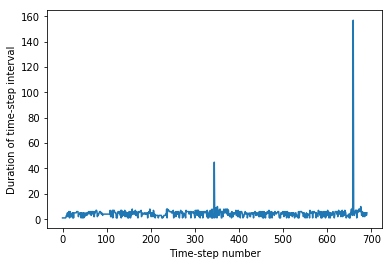

In [15]:
print df['timestamp'][1] - df['timestamp'][0]  # We want to either change the format of the timestamps, or just use them in this form.
intervals = []

for i in range(df.shape[0] - 1):
    intervals.append(df['timestamp'][i+1] - df['timestamp'][i])

interval_arr = np.array([i.total_seconds() for i in intervals])  # Convert these to seconds as floating points
plt.plot(interval_arr)
plt.ylabel('Duration of time-step interval')
plt.xlabel('Time-step number')

We see that there are two huge breaks in the time recordings. At least for the second peak, this seems to be placed near where the NaN and "walking" rows where, so this makes sense.

These might not cause too many problems, as long as we used timestamp values instead of index values for plotting against time

Let's look at some stats of the time intervals to get an idea sort of cadence we have (not including the two big peaks)

Median time interval: 5.0


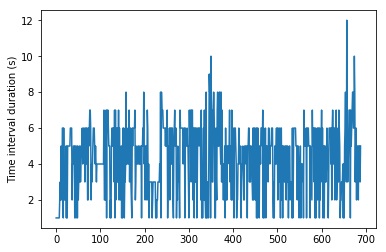

In [16]:
print 'Median time interval:', np.median(interval_arr)
interval_arr_base = interval_arr - np.median(interval_arr)
three_sig = 3 * np.std(interval_arr_base)
interval_arr_sigclip = interval_arr[np.abs(interval_arr_base) < three_sig]
plt.plot(interval_arr_sigclip)
plt.ylabel('Time interval duration (s)')

In [17]:
df['timestamp_sec'] = (df['timestamp'] - df['timestamp'][0])  # Make new column with seconds from start
df['timestamp_sec'] = [tstamp.total_seconds() for tstamp in df['timestamp_sec']]
df.set_index('timestamp_sec', inplace=True)  # Set the seconds from start as the DataFrame index
df.head()

,activity_type,altitude,cadence,distance,fractional_cadence,heart_rate,position_lat,position_long,speed,stance_time,stance_time_balance,stance_time_percent,step_length,timestamp,unknown_61,unknown_66,vertical_oscillation,vertical_ratio
timestamp_sec,,,,,,,,,,,,,,,,,,
0.0,running,169.0,89,0.00,0.5,86,53.649564,-1.803813,2.706,225.0,49.78,33.25,605.0,2018-02-03 08:40:19,3624,47,88.7,14.15
1.0,running,169.0,90,0.00,0.0,87,53.649569,-1.803868,1.847,222.0,49.87,33.00,626.0,2018-02-03 08:40:20,3624,47,87.7,13.93
2.0,running,168.4,90,2.56,0.0,90,53.649545,-1.803891,1.913,224.0,50.09,33.50,961.0,2018-02-03 08:40:21,3621,46,87.7,12.28
3.0,running,168.0,90,2.56,0.0,95,53.649548,-1.803947,1.978,222.0,50.31,33.00,951.0,2018-02-03 08:40:22,3619,46,87.7,10.81
4.0,running,167.8,90,4.91,0.0,95,53.649526,-1.803971,1.997,218.0,50.43,32.75,943.0,2018-02-03 08:40:23,3618,46,87.7,10.25


# Visualisation

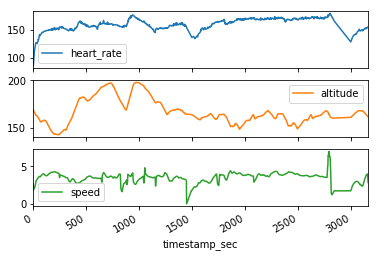

In [18]:
df.plot(kind='line', y=['heart_rate', 'altitude', 'speed'], subplots=True)
plt.show()

In [19]:
# Taken from GPS_car notebook (basically just uses gmap.plot to make html of route plotted on Google maps)
# Made into a function so that a 3rd variable can be used for colour visualisation
def plot_colourline_gmap(x, y, c):
    c = cm.jet((c-c.min()) / (c.max()-c.min()))   # Defines colours as tuples with each val within 0 - 1
    c = [mpl.colors.to_hex(clr) for clr in c]     # gmplot can only accept colours in hexidecimal format
    for i in np.arange(len(x)-1):
        gmap.plot([x[i],x[i+1]], [y[i],y[i+1]], c=c[i], edge_width=5)
    return

In [20]:
# Create gmplot instance with location of map centre and zoom level (1 - 20)
gmap = gmplot.GoogleMapPlotter(np.mean(df['position_lat']), np.mean(df['position_long']), 15)
# Plot altitude as the colour argument
plot_colourline_gmap(df['position_lat'].values, df['position_long'].values, df['altitude'].values)

gmap.draw("Gary_garmin_route_plot.html")

## Heart rate zones

Maximum heart rate ~ 220 - 30 = 190 bpm

Assume resting heart rate ~ 60 bpm

Heart rate reserve (HRR) = max - resting = 190 - 60 = 130 bpm

**Fat-burning** = resting + (0.5 x HRR to 0.75 x HRR)  =  60 + (0.5 x 130 to 0.75 x 130)  =  **125 to 158 bpm**

**Aerobic** = resting + (0.75 x HRR to 0.85 x HRR) = 60 + (0.75 x 130 to 0.85 x HRR) = **158 to 171 bpm**

**Aerobic-Anaerobic** = resting + (0.85 x HRR to 0.90 x HRR) = 60 + (0.85 x 130 to 0.90 x HRR) = **171 to 177 bpm**

**Anaerobic** = resting + (0.90 x HRR) to max = 60 + (0.90 x 130) to max = **177 to 190 bpm**

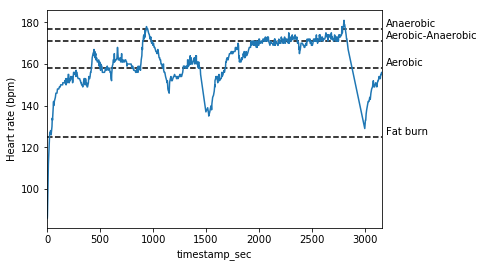

In [21]:
df.plot(kind='line', y='heart_rate', legend=False)
plt.hlines(125, df.index[0], df.index[-1], linestyles='dashed')
plt.hlines(158, df.index[0], df.index[-1], linestyles='dashed')
plt.hlines(171, df.index[0], df.index[-1], linestyles='dashed')
plt.hlines(177, df.index[0], df.index[-1], linestyles='dashed')
plt.ylabel('Heart rate (bpm)')
plt.text(3200, 126, 'Fat burn')
plt.text(3200, 159, 'Aerobic')
plt.text(3200, 172, 'Aerobic-Anaerobic')
plt.text(3200, 178, 'Anaerobic')
plt.show()

Seems like the run covered all zones... Let's look at the percentage of time spent in each:

In [22]:
fat_burn = np.logical_and(df['heart_rate'] >= 125, df['heart_rate'] < 158)
aerobic = np.logical_and(df['heart_rate'] >= 158, df['heart_rate'] < 171)
aerobic_anaerobic = np.logical_and(df['heart_rate'] >= 171, df['heart_rate'] < 177)
anaerobic = df['heart_rate'] >= 177

In [23]:
fat_burn_t = interval_arr[fat_burn[1:]].sum()
aerobic_t = interval_arr[aerobic[1:]].sum()
aerobic_anaerobic_t = interval_arr[aerobic_anaerobic[1:]].sum()
anaerobic_t = interval_arr[anaerobic[1:]].sum()
print '% fat burn = ' + "{0:.1f}".format(100 * fat_burn_t / df.index[-1]) + ' %'
print '% aerobic = ' + "{0:.1f}".format(100 * aerobic_t / df.index[-1]) + ' %'
print '% aerobic-anaerobic = ' + "{0:.1f}".format(100 * aerobic_anaerobic_t / df.index[-1]) + ' %'
print '% anaerobic = ' + "{0:.1f}".format(100 * anaerobic_t / df.index[-1]) + ' %'

% fat burn = 39.3 %
% aerobic = 37.0 %
% aerobic-anaerobic = 21.6 %
% anaerobic = 1.4 %


## Correlations

Here we plot a scatter matrix to see what the relationships between the individual features look like

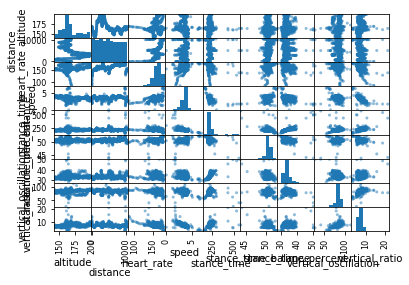

In [25]:
corr_features = ['altitude', 'distance', 'heart_rate', 'speed', 'stance_time', 'stance_time_balance', 'stance_time_percent',
                'timestamp', 'vertical_oscillation', 'vertical_ratio']
scatter_matrix(df[corr_features])
plt.show()

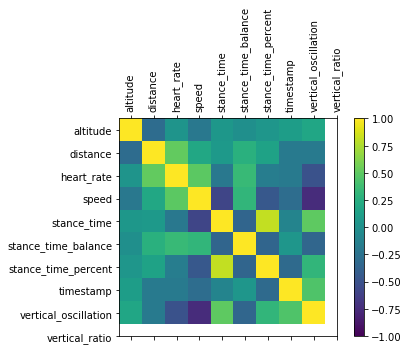

In [26]:
# Correlation
correlations = df[corr_features].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(len(corr_features))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_features, rotation=90)
ax.set_yticklabels(corr_features)
plt.show()

Altitude probably not that useful, it's probably the change in altitude that is more likely to be correlated with other variables. Let's have a look

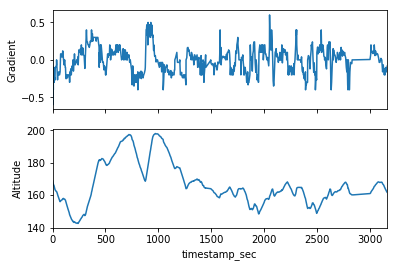

In [43]:
altitude_gradient = []
for i in range(df.shape[0] - 1): 
    grad = (df['altitude'].iloc[i+1] - df['altitude'].iloc[i]) / (df.index[i+1] - df.index[i])
    altitude_gradient.append(grad)
    
altitude_gradient = np.array(altitude_gradient)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df.index[1:], altitude_gradient)
ax[0].set_ylabel('Gradient')
df.plot(y='altitude', ax=ax[1], legend=False)
ax[1].set_ylabel('Altitude')
plt.show()

The gradient looks quite noisy, so will try to smooth it a bit:

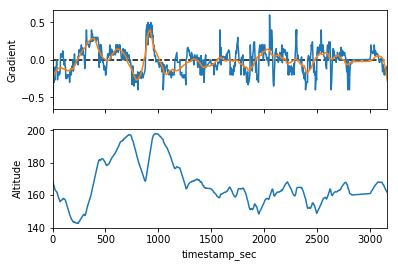

In [50]:
altitude_gradient_smooth = savgol_filter(altitude_gradient, window_length=55, polyorder=3)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df.index[1:], altitude_gradient)
ax[0].plot(df.index[1:], altitude_gradient_smooth)
ax[0].hlines(0, 0, 3500, linestyle='dashed')
ax[0].set_ylabel('Gradient')
df.plot(y='altitude', ax=ax[1], legend=False)
ax[1].set_ylabel('Altitude')
plt.show()

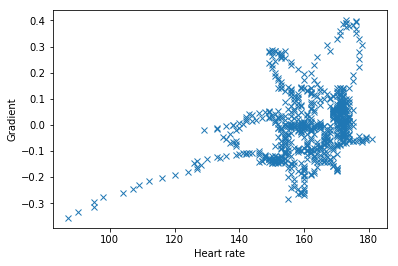

Heart rate vs altitude: [[ 1.          0.03566865]
 [ 0.03566865  1.        ]]
Heart rate vs gradient: [[ 1.          0.23121416]
 [ 0.23121416  1.        ]]
Heart rate vs smoothed gradient: [[ 1.          0.35443087]
 [ 0.35443087  1.        ]]
Heart rate vs smoothed gradient, first half of run: [[ 1.          0.49401781]
 [ 0.49401781  1.        ]]


In [70]:
plt.plot(df.loc[1:, 'heart_rate'], altitude_gradient_smooth, 'x')
plt.ylabel('Gradient')
plt.xlabel('Heart rate')
plt.show()
print 'Heart rate vs altitude:', np.corrcoef(df['heart_rate'], df['altitude'])
print 'Heart rate vs gradient:', np.corrcoef(df.loc[1:, 'heart_rate'], altitude_gradient)
print 'Heart rate vs smoothed gradient:', np.corrcoef(df.loc[1:, 'heart_rate'], altitude_gradient_smooth)
half = df.index.size / 2
print 'Heart rate vs smoothed gradient, first half of run:', np.corrcoef(df['heart_rate'].iloc[1:half+1], altitude_gradient_smooth[:half])

The first half of the run seems to be much more correlated with heart rate. This makes sense as there are much larger changes in altitude here than in the second half. We'll just plot the first half:

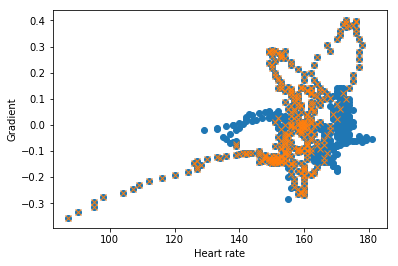

In [71]:
plt.plot(df.loc[1:, 'heart_rate'], altitude_gradient_smooth, 'o')
plt.plot(df['heart_rate'].iloc[1:half+1], altitude_gradient_smooth[:half], 'x')
plt.ylabel('Gradient')
plt.xlabel('Heart rate')
plt.show()

Have to be a bit careful as the initial burn-in of the run (~ 20 - 25 seconds) may be significantly increasing the apparent correlation, but here the heart rate would be rising due to the beginning of the exercise, irrespective of the gradient. Thus, we'll cut this off:

In [73]:
print 'Heart rate vs smoothed gradient, first half of run, with initial burn-in cut off:'
print np.corrcoef(df['heart_rate'].iloc[14:half+1], altitude_gradient_smooth[13:half])

Heart rate vs smoothed gradient, first half of run, with initial burn-in cut off:
[[ 1.          0.42103381]
 [ 0.42103381  1.        ]]


This reduces the correlation a bit, but it still seems like there is a possible relationship between heart rate and gradient. This would be tested with more data, especially steeper gradients.

From the full feature correlation plot earlier it seems like speed could be correlated with stance time (duration of contact with ground) and with vertical oscillation.

There are a few outlier points in both stance time and vertical oscillation so we'll get rid of these first.

In [82]:
base = df['stance_time'] - df['stance_time'].median()
std = base.std()
mask_st = np.abs(base) < 3 * std

base = df['vertical_oscillation'] - df['vertical_oscillation'].median()
std = base.std()
mask_vo = np.abs(base) < 3 * std

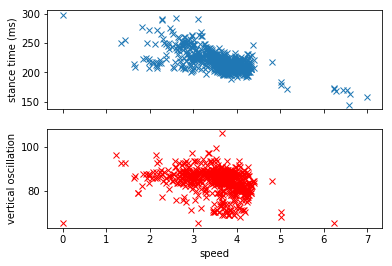

In [86]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df['speed'][mask_st], df['stance_time'][mask_st], 'x')
ax[0].set_ylabel('stance time (ms)')

ax[1].plot(df['speed'][mask_vo], df['vertical_oscillation'][mask_vo], 'rx')
ax[1].set_ylabel('vertical oscillation')
ax[1].set_xlabel('speed')
plt.show()